In [1]:
%matplotlib inline
import pynucastro as pyna
import numpy as np

http://articles.adsabs.harvard.edu/pdf/1992ApJ...396..649T
Table 1 Net 4 N = 83

But with electron captures

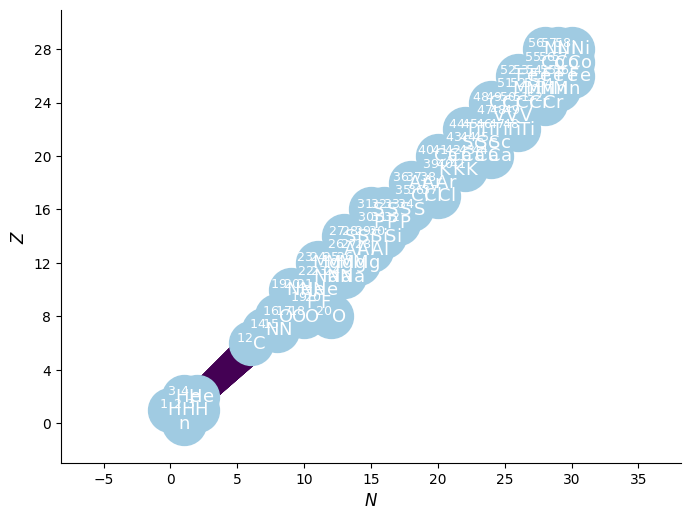

In [2]:
Nuclei = { 
    "H" : [1,3],
    "He" : [3,4],
    "C" : [12,12],
    "N" : [14,15],
    "O" : [16, 18],
    "F" : [19, 20], 
    "Ne" : [19,21],
    "Na" : [22, 24],
    "Mg" : [23, 26],
    "Al" : [26, 28],
    "Si" : [27, 30],
    "P"  : [30, 32],
    "S"  : [31, 34],
    "Cl" : [35, 37], 
    "Ar" : [36, 38],
    "K"  : [39, 41],
    "Ca" : [40, 44],
    "Sc" : [43, 45], 
    "Ti" : [44, 48],
    "V"  : [47, 49], 
    "Cr" : [48, 52],
    "Mn" : [51, 54],
    "Fe" : [52, 56],
    "Co" : [55, 57],
    "Ni" : [56, 58]    
}
All_Nuclei = []
for Nuc, Num in Nuclei.items():
    for i in range(Num[0], Num[1]+1):
        All_Nuclei.append(Nuc + str(i))
All_Nuclei.append("n") #neutron
assert len(All_Nuclei) == 83



library_file = '../results07070315'
mylibrary = pyna.rates.Library(library_file)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]
Net4_TW1992_lib = mylibrary.linking_nuclei(All_Nuclei, with_reverse=True)

from pynucastro import Nucleus
new_rates = []
#screens out duplicate rates that we include in the escn_tabular.
for rate in Net4_TW1992_lib.get_rates():
    if rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("o20")]:
        continue
    elif rate.reactants == [Nucleus("ne20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("o20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("ne20")]:
        continue
    else:
        new_rates.append(rate)
        
Net4_TW1992 = pyna.networks.StarKillerNetwork(rates = new_rates, rate_files=escn_tabular)
Net4_TW1992.plot()

Net4_TW1992.write_network()